<a href="https://colab.research.google.com/github/plue1011/ObjectDetection/blob/master/ImagePath2DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


パッケージのimport

In [0]:
import glob
# XMLをファイルやテキストから読み込んだり、加工したり、保存したりするためのライブラリ
import xml.etree.ElementTree as ET

import cv2
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

%matplotlib inline

データの解凍

In [0]:
!tar -zxf /content/drive/My\ Drive/study/CNN/dataset/RoadDamageDataset.tar.gz

# フォルダの確認

In [0]:
root_path = "/content/RoadDamageDataset/Adachi/"

In [8]:
glob.glob(root_path + "ImageSets/Main/*")

['/content/RoadDamageDataset/Adachi/ImageSets/Main/val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D20_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D01_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D44_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D10_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D11_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D00_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D20_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D11_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/train_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D10_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D00_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D44_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D10_trainval

In [9]:
glob.glob(root_path + "Annotations/*")[:10]

['/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170906093924.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170906102608.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170907140311.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100119.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170914151307.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170906152354.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908145945.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170911105006.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908144319.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908134738.xml']

In [10]:
glob.glob(root_path + "JPEGImages/*")[:10]

['/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912152211.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170921111658.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170921111435.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912144027.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908100748.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912093908.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170920150551.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170911104748.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170906150630.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170914151632.jpg']

# データのパスリスト作成

/content/RoadDamageDataset/Adachi/ImageSets/Main/train.txtには学習用のデータIDが入っている

In [11]:
id_names = root_path + "ImageSets/Main/train.txt"
id_names

'/content/RoadDamageDataset/Adachi/ImageSets/Main/train.txt'

In [12]:
for line in open(id_names):
    print(line)
    file_id = line.strip()  # 空白スペースと改行を除去
    print(file_id)
    img_path = root_path + "JPEGImages/" + file_id + ".jpg"
    anno_path = root_path + "Annotations/" + file_id + ".xml"
    print(img_path)
    print(anno_path)
    break

Adachi_20170908100929

Adachi_20170908100929
/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908100929.jpg
/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100929.xml


In [0]:
def make_data_path_list(root_path, train_val):
    # 学習データの画像ファイルとアノテーションファイルへのパスリストを作成
    img_path_list = []
    anno_path_list = []

    id_names = root_path + "ImageSets/Main/" + train_val + ".txt"

    for line in open(id_names):
        file_id = line.strip()  # 空白スペースと改行を除去
        img_path = root_path + "JPEGImages/" + file_id + ".jpg"
        anno_path = root_path + "Annotations/" + file_id + ".xml"
        img_path_list.append(img_path)
        anno_path_list.append(anno_path)

    return img_path_list, anno_path_list

In [14]:
# ファイルリストの作成
train_img_path_list, train_anno_path_list = make_data_path_list(root_path, "train")
# 動作確認
print(train_img_path_list[0])
print(train_anno_path_list[0])

/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908100929.jpg
/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100929.xml


In [15]:
# ファイルリストの作成
val_img_path_list, val_anno_path_list = make_data_path_list(root_path, "val")
# 動作確認
print(val_img_path_list[0])
print(val_anno_path_list[0])

/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908142224.jpg
/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908142224.xml


# xmlファイルをリストに変換する

Adachi_20170908100929.xml
```xml
<annotation>
    <folder>Adachi</folder>
    <filename>Adachi_20170908100929.jpg</filename>
    <size>
        <width>600</width>
        <height>600</height>
    </size>
    <segmented>0</segmented>
    <object>
        <name>D10</name>
        <bndbox>
            <xmin>170</xmin>
            <ymin>284</ymin>
            <xmax>361</xmax>
            <ymax>462</ymax>
        </bndbox>
    </object>
    <object>
        <name>D01</name>
        <bndbox>
            <xmin>375</xmin>
            <ymin>186</ymin>
            <xmax>595</xmax>
            <ymax>476</ymax>
        </bndbox>
    </object>
</annotation>
```

In [16]:
train_anno_path_list[0]

'/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100929.xml'

In [0]:
# xmlファイルを読み込む
xml_path = train_anno_path_list[0]
xml = ET.parse(xml_path).getroot()

In [18]:
# xmlファイルの全タグ
print([tag_name.tag for tag_name in  xml.iter()])
box_list = []
for obj in xml.iter("object"):
    print("object_name:{}".format(obj.find("name").text))

    bbox = obj.find('bndbox')  # バウンディングボックスの情報
    pts = ['xmin', 'ymin', 'xmax', 'ymax']
    box = []
    for pt in (pts):
        box.append(int(bbox.find(pt).text))
        print("{}:{}".format(pt, bbox.find(pt).text))
    box_list.append(box)

['annotation', 'folder', 'filename', 'size', 'width', 'height', 'segmented', 'object', 'name', 'bndbox', 'xmin', 'ymin', 'xmax', 'ymax', 'object', 'name', 'bndbox', 'xmin', 'ymin', 'xmax', 'ymax']
object_name:D10
xmin:170
ymin:284
xmax:361
ymax:462
object_name:D01
xmin:375
ymin:186
xmax:595
ymax:476


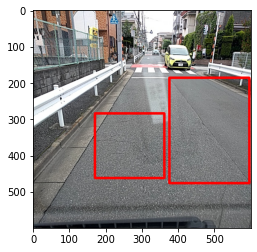

In [20]:
# 動作確認
img = cv2.imread(train_img_path_list[0])  # [高さ][幅][色BGR]
for pos in box_list:
    xmin, ymin, xmax, ymax = pos[:4]
    
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
# 「XML形式のアノテーション」を、リスト形式に変換するクラス
class Anno_xml2list(object):
    """
    1枚の画像に対する「XML形式のアノテーションデータ」を、画像サイズで規格化してからリスト形式に変換する。

    Attributes
    ----------
    classes : リスト
        VOCのクラス名を格納したリスト
    """

    # 矩形のクラスリストを入力する
    def __init__(self, classes):
        self.classes = classes

    def __call__(self, xml_path, width, height):
        """
        1枚の画像に対する「XML形式のアノテーションデータ」を、画像サイズで規格化してからリスト形式に変換する。

        Parameters
        ----------
        xml_path : str
            xmlファイルへのパス。
        width : int
            対象画像の幅。
        height : int
            対象画像の高さ。

        Returns
        -------
        ret : [[xmin, ymin, xmax, ymax, label_ind], ... ]
            物体のアノテーションデータを格納したリスト。画像内に存在する物体数分のだけ要素を持つ。
        """

        # 画像内の全ての物体のアノテーションをこのリストに格納します
        ret = []

        # xmlファイルを読み込む
        xml = ET.parse(xml_path).getroot()

        # 画像内にある物体（object）の数だけループする
        for obj in xml.iter('object'):
            # 1つの物体に対するアノテーションを格納するリスト
            bndbox = []

            name = obj.find('name').text.strip()  # 物体名
            bbox = obj.find('bndbox')  # バウンディングボックスの情報

            # アノテーションの xmin, ymin, xmax, ymaxを取得し、0～1に規格化
            pts = ['xmin', 'ymin', 'xmax', 'ymax']

            for pt in (pts):
                # damagedatasetは原点が(1,1)なので1を引き算して（0, 0）に
                # https://github.com/IshitaTakeshi/RoadDamageDetector/wiki/Road-Damage-Dataset
                cur_pixel = int(bbox.find(pt).text) - 1

                # 幅、高さで規格化
                if pt == 'xmin' or pt == 'xmax':  # x方向のときは幅で割算
                    cur_pixel /= width
                else:  # y方向のときは高さで割算
                    cur_pixel /= height

                bndbox.append(cur_pixel)

            # アノテーションのクラス名のindexを取得して追加
            label_idx = self.classes.index(name)
            bndbox.append(label_idx)

            # retに[xmin, ymin, xmax, ymax, label_ind]を足す
            ret += [bndbox]

        return np.array(ret)  # [[xmin, ymin, xmax, ymax, label_idx], ... ]

In [22]:
# 動作確認
# ひびの割れ方のクラス
damage_class=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# インスタンスの作成
transform_anno = Anno_xml2list(damage_class)

# 画像の読み込み OpenCVを使用
img = cv2.imread(train_img_path_list[0])  # [高さ][幅][色BGR]
height, width, channels = img.shape  # 画像のサイズを取得

# アノテーションをリストで表示
anno_info = transform_anno(train_anno_path_list[0], width, height)
anno_info

array([[0.28166667, 0.47166667, 0.6       , 0.76833333, 2.        ],
       [0.62333333, 0.30833333, 0.99      , 0.79166667, 1.        ]])

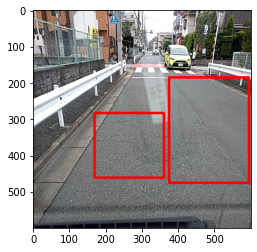

In [23]:
for anno in anno_info:
    # 規格化を元に戻す
    xmin, ymin, xmax, ymax = anno[:4]
    xmin *= width
    xmax *= width
    ymin *= height
    ymax *= height
    
    cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0,0,255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 物体検出用transformの作成

In [0]:
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img, boxes=None, labels=None):
        for t in self.transforms:
            img, boxes, labels = t(img, boxes, labels)
        return img, boxes, labels

In [0]:
class ConvertFromInts(object):
    def __call__(self, image, boxes=None, labels=None):
        return image.astype(np.float32), boxes, labels

In [0]:
class Resize(object):
    def __init__(self, size=300):
        self.size = size

    def __call__(self, image, boxes=None, labels=None):
        image = cv2.resize(image, (self.size, self.size))
        return image, boxes, labels

In [0]:
class DataTransform():
    """
    画像とアノテーションの前処理クラス
    画像のサイズを300x300にする

    Attributes
    ----------
    input_size : int
        リサイズ先の画像の大きさ
    color_mean : (B, G, R)
        各色チャネルの平均値
    """

    def __init__(self, input_size):
        self.data_transform = Compose([
                                       ConvertFromInts(),  # intをfloat32に変換
                                       Resize(input_size)  # 画像サイズをinput_size×input_sizeに変形
                                       ])

    def __call__(self, img, boxes, labels):
        return self.data_transform(img, boxes, labels)

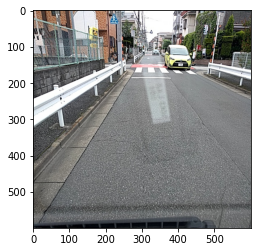

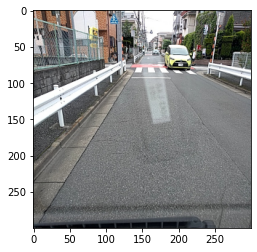

In [28]:
# 動作の確認

# 1. 画像読み込み
image_file_path = train_img_path_list[0]
img = cv2.imread(image_file_path)  # [高さ][幅][色BGR]
height, width, channels = img.shape  # 画像のサイズを取得

# 2. アノテーションをリストに
transform_anno = Anno_xml2list(damage_class)
anno_list = transform_anno(train_anno_path_list[0], width, height)

# 3. 元画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 4. 前処理クラスの作成
input_size = 300  # 画像のinputサイズを300×300にする
transform = DataTransform(input_size)

# 5. train画像の表示
img_transformed, boxes, labels = transform(img, anno_list[:, :4], anno_list[:, 4])
plt.imshow(cv2.cvtColor(img_transformed.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.show()

# Datasetの作成

In [0]:
class DamageDataset(Dataset):
    """
    damagedatasetのDatasetを作成するクラス。PyTorchのDatasetクラスを継承。

    Attributes
    ----------
    img_list : リスト
        画像のパスを格納したリスト
    anno_list : リスト
        アノテーションへのパスを格納したリスト
    transform : object
        前処理クラスのインスタンス
    transform_anno : object
        xmlのアノテーションをリストに変換するインスタンス
    """

    def __init__(self, img_path_list, anno_path_list, transform, transform_anno):
        self.img_path_list = img_path_list
        self.anno_path_list = anno_path_list
        self.transform = transform  # 画像の変形
        self.transform_anno = transform_anno  # アノテーションデータをxmlからリストへ

    def __len__(self):
        '''画像の枚数を返す'''
        return len(self.img_path_list)

    def __getitem__(self, index):
        '''
        前処理をした画像のテンソル形式のデータとアノテーションを取得
        '''
        im, gt, h, w = self.pull_item(index)
        return im, gt

    def pull_item(self, index):
        '''前処理をした画像のテンソル形式のデータ、アノテーション、画像の高さ、幅を取得する'''

        # 1. 画像読み込み
        image_file_path = self.img_path_list[index]
        img = cv2.imread(image_file_path)  # [高さ][幅][色BGR]
        height, width, channels = img.shape  # 画像のサイズを取得

        # 2. xml形式のアノテーション情報をリストに
        anno_file_path = self.anno_path_list[index]
        anno_list = self.transform_anno(anno_file_path, width, height)

        # 3. 前処理を実施
        img, boxes, labels = self.transform(img, anno_list[:, :4], anno_list[:, 4])

        # 色チャネルの順番がBGRになっているので、RGBに順番変更
        # さらに（高さ、幅、色チャネル）の順を（色チャネル、高さ、幅）に変換
        img = torch.from_numpy(img[:, :, (2, 1, 0)]).permute(2, 0, 1)

        # BBoxとラベルをセットにしたnp.arrayを作成、変数名「gt」はground truth（答え）の略称
        gt = np.hstack((boxes, np.expand_dims(labels, axis=1)))

        return img, gt, height, width

In [30]:
# 動作確認
# 画像のinputサイズを300×300にする
input_size = 300

# ひびの割れ方のクラス
damage_class = ["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

train_dataset = DamageDataset(train_img_path_list, train_anno_path_list, transform=DataTransform(input_size), transform_anno=Anno_xml2list(damage_class))
val_dataset = DamageDataset(val_img_path_list, val_anno_path_list, transform=DataTransform(input_size), transform_anno=Anno_xml2list(damage_class))


# データの取り出し例
val_dataset[0]

(tensor([[[  3.5000,   5.2500,   1.5000,  ...,  17.2500,  54.5000,   8.2500],
          [  1.0000,   2.5000,   1.7500,  ...,  11.0000,  49.7500,  54.5000],
          [  0.0000,   0.7500,   1.2500,  ...,  15.0000,  28.0000,  43.0000],
          ...,
          [  0.0000,   0.0000,   0.0000,  ..., 169.2500, 179.0000, 186.7500],
          [  0.0000,   0.0000,   0.0000,  ..., 231.0000, 228.7500, 237.5000],
          [  0.0000,   0.0000,   0.0000,  ..., 246.7500, 243.2500, 239.7500]],
 
         [[ 11.7500,  13.5000,  10.0000,  ...,  69.0000,  85.5000,  41.0000],
          [  9.0000,   8.5000,   7.0000,  ...,  58.2500,  78.7500,  86.5000],
          [  7.7500,   5.7500,   6.0000,  ...,  63.7500,  62.2500,  83.5000],
          ...,
          [  1.0000,   1.0000,   1.0000,  ..., 184.0000, 195.7500, 204.0000],
          [  0.0000,   0.0000,   0.0000,  ..., 243.0000, 242.0000, 252.0000],
          [  0.0000,   0.0000,   0.0000,  ..., 255.0000, 254.2500, 254.5000]],
 
         [[  8.7500,   8.500

# DataLoaderの作成

In [0]:
# 参考にするリンクhttps://qiita.com/tomp/items/f220bd6ffec006dabaa5
# 物体検知の場合は、一つの画像データにtargetが複数存在するため、collate_fnを設定しないと、 DataLoaderが作成できない

def od_collate_fn(batch):
    """
    Datasetから取り出すアノテーションデータのサイズが画像ごとに異なります。
    画像内の物体数が2個であれば(2, 5)というサイズですが、3個であれば（3, 5）など変化します。
    この変化に対応したDataLoaderを作成するために、
    カスタイマイズした、collate_fnを作成します。
    collate_fnは、PyTorchでリストからmini-batchを作成する関数です。
    ミニバッチ分の画像が並んでいるリスト変数batchに、
    ミニバッチ番号を指定する次元を先頭に1つ追加して、リストの形を変形します。
    """

    targets = []
    imgs = []
    for sample in batch:
        imgs.append(sample[0])  # sample[0] は画像imgです
        targets.append(torch.FloatTensor(sample[1]))  # sample[1] はアノテーションgtです

    # imgsはミニバッチサイズのリストになっています
    # リストの要素はtorch.Size([3, 300, 300])です。
    # このリストをtorch.Size([batch_num, 3, 300, 300])のテンソルに変換します
    imgs = torch.stack(imgs, dim=0)

    # targetsはアノテーションデータの正解であるgtのリストです。
    # リストのサイズはミニバッチサイズです。
    # リストtargetsの要素は [n, 5] となっています。
    # nは画像ごとに異なり、画像内にある物体の数となります。
    # 5は [xmin, ymin, xmax, ymax, class_index] です

    return imgs, targets

In [32]:
# DataLoaderの作成
batch_size = 4

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=od_collate_fn)

val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=od_collate_fn)

# 辞書型変数にまとめる
dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

# 動作の確認
batch_iterator = iter(dataloaders_dict["val"])  # イタレータに変換
images, targets = next(batch_iterator)  # 1番目の要素を取り出す
print(images.size())  # torch.Size([4, 3, 300, 300]) ミニバッチ数, 色チャネル数, 縦サイズ, 横サイズ
print(len(targets))  # ミニバッチ数
print(targets[3].size())  # ミニバッチのサイズのリスト、各要素は[n, 5]、nは物体数

torch.Size([4, 3, 300, 300])
4
torch.Size([2, 5])


# 一連のコード

In [0]:
# google colobでモジュール読み込みのために必要
import sys
sys.path.append("/content/drive/My Drive/study/CNN/Object_Detection/utils")

from path2dataloader import make_data_path_list
from path2dataloader import Anno_xml2list
from path2dataloader import DataTransform
from path2dataloader import DamageDataset
from path2dataloader import od_collate_fn

In [0]:
root_path = "/content/RoadDamageDataset/Adachi/"

# ファイルリストの作成
train_img_path_list, train_anno_path_list = make_data_path_list(root_path, "train")
val_img_path_list, val_anno_path_list = make_data_path_list(root_path, "val")

# ひびの割れ方のクラス
damage_class=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

In [0]:
# 画像のinputサイズを300×300にする
input_size = 300

# ひびの割れ方のクラス
damage_class = ["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

train_dataset = DamageDataset(train_img_path_list, train_anno_path_list, transform=DataTransform(input_size), transform_anno=Anno_xml2list(damage_class))
val_dataset = DamageDataset(val_img_path_list, val_anno_path_list, transform=DataTransform(input_size), transform_anno=Anno_xml2list(damage_class))


In [0]:
# DataLoaderの作成
batch_size = 4

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=od_collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=od_collate_fn)